In [3]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
class KeemPlot:
    def __init__(self, path, max_value=4095, threshold=500):
        self._max_value = max_value
        self._threshold = threshold
        self.Raw_Arrays = self._gen_raw_arrays(path)
        self.flatdata, self.barcodes = self._get_codes(self.Raw_Arrays)

    def _gen_raw_arrays(self, path):
        image_names = os.listdir(path)
        Raw_Images = []
        for i, name in enumerate(image_names):
            Raw_Images.append(io.imread(path+name)[:,:,0])

        return Raw_Images
    
    def _interp1d(self, array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)
    
    def _get_codes(self, Raw_data):

        flatdata = []
        barcodes = []

        for i, image in enumerate(Raw_data):
            arr = image.max(axis=0)
            arr[arr<self._threshold]=0   #Threshold out noise/unwanted dim signal.
            arr = arr/self._max_value    #Normalize to values between 0 and 1.
            final = self._interp1d(arr, 10000)
            flatdata.append(final)
            barcodes.append(np.vstack([final for i in range(500)]))

        return flatdata, barcodes
    
    def plot_barcodes(self, barcodes, save=None):

        fig, axes = plt.subplots(len(barcodes), 1)

        for i, bar in enumerate(barcodes):
            axes[i].imshow(bar, cmap="Greys_r")
            axes[i].axis("off")

        fig.subplots_adjust(wspace=0,hspace=0)
        
        if save is not None:
            fig.savefig(save)


In [6]:
path1 = "E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/test1/Slide_1/READY_TO_READ/"
path2 = "E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/test1/Slide_2/READY_TO_READ/"

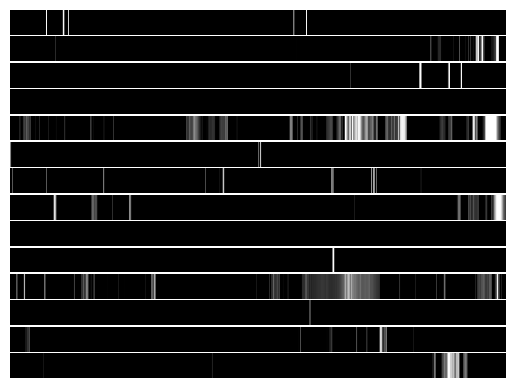

In [7]:
dir1 = KeemPlot(path1)
dir2 = KeemPlot(path2)

double_codes = [*dir1.barcodes, *dir2.barcodes]
dir1.plot_barcodes(double_codes, "test_fig")

In [8]:
all_arrays = [*dir1.flatdata, *dir2.flatdata]